In [1]:
# The file that contains the normal DoH traffic data.
normal_doh_traffic_dataset = 'normal_doh_traffic_cloudflare_server.csv'

# The file that contains the malicious DoH traffic.
malicious_doh_traffic_dataset = 'dnscat2_data_4.csv'

# Import the pandas library
import pandas as pd

# Load the datasets into Pandas dataframes
normal_traffic_df    = pd.read_csv(normal_doh_traffic_dataset)
malicious_traffic_df = pd.read_csv(malicious_doh_traffic_dataset)

# Concatenate the normal testing data and the malicious data to
# create the evaluation data set
data_evaluation_df = pd.concat([normal_traffic_df, malicious_traffic_df])

# Shuffle the samples in the whole dataset.
data_evaluation_df = data_evaluation_df.sample(data_evaluation_df.shape[0], random_state=1)

# Save to CSV file
data_evaluation_df.to_csv('combined_doh_dataset.csv', index=False)
from google.colab import files
files.download('combined_doh_dataset.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('combined_doh_dataset.csv')

# If needed
df['is_doh'] = df['is_doh'].map({1: 0, 4: 1})

In [4]:
from sklearn.model_selection import train_test_split

features = [
    'bytes_in',
    'bytes_out',
    'num_pkts_in',
    'num_pkts_out',
    'bytes_ration',
    'time',
    'avgdelay',
    'maxdelay'
]

X = df[features]
y = df['is_doh']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

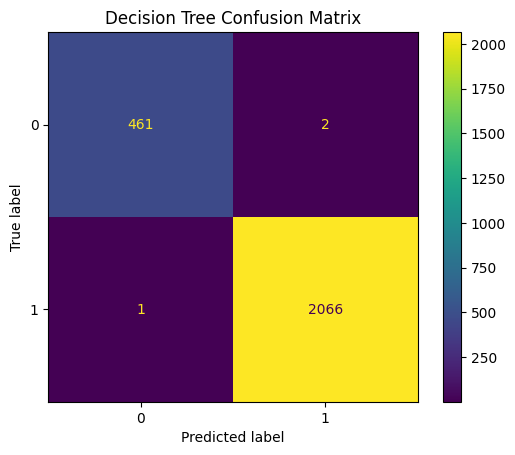

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

tree_height = 2
tree_clf = DecisionTreeClassifier(max_depth=tree_height, random_state=1)

tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9988142292490119
Precision: 0.9990328820116054
Recall: 0.9995162070633768
F1-Score: 0.9992744860943168


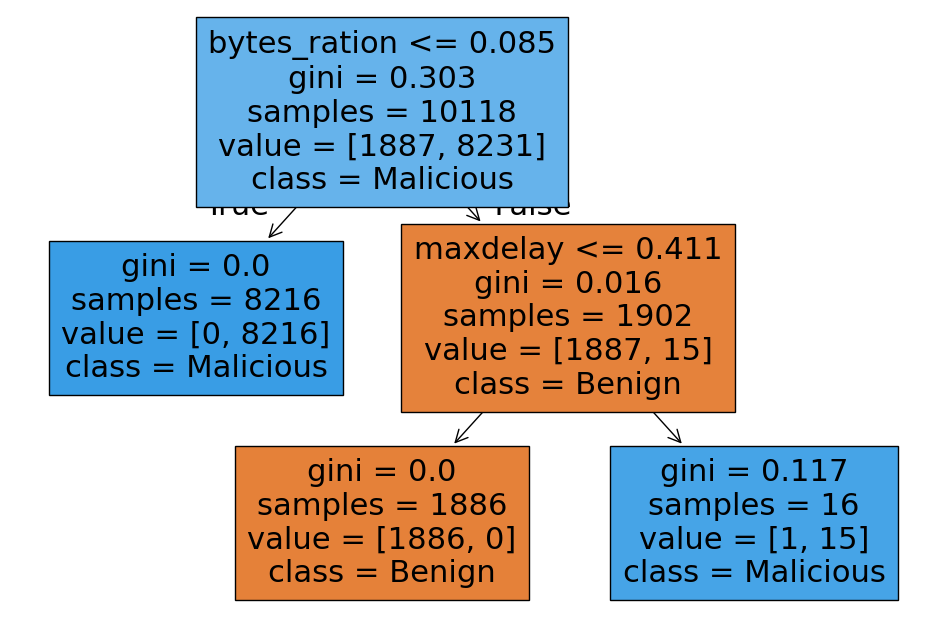

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(tree_clf,
          feature_names=features,
          class_names=['Benign','Malicious'],
          filled=True)
plt.show()

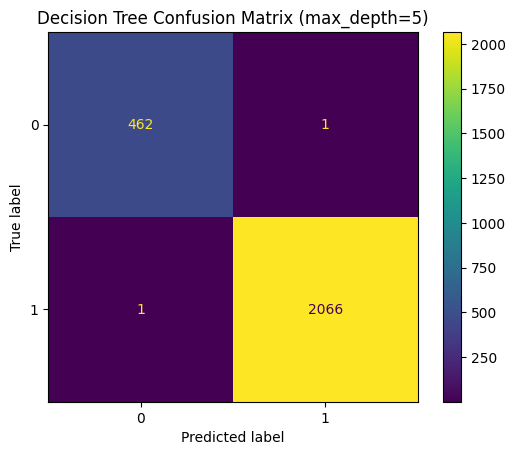

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Try deeper tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1)

tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Decision Tree Confusion Matrix (max_depth=5)")
plt.show()

In [9]:
for depth in [2, 3, 5, 10]:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Depth {depth} → Accuracy: {accuracy:.4f}")

Depth 2 → Accuracy: 0.9988
Depth 3 → Accuracy: 0.9992
Depth 5 → Accuracy: 0.9992
Depth 10 → Accuracy: 0.9992


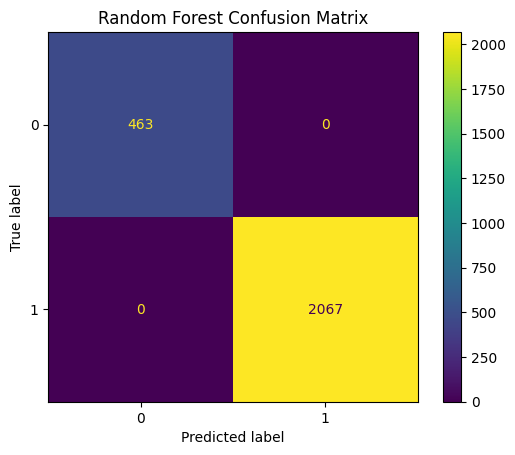

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=1
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
